In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Path of the dataset
file_path='/content/drive/MyDrive/housing_regression_dataset.csv'
df=pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
#Display dataset information if loaded
print("\nDataset Preview:")
print(df.head())
print("\nColumns Names:")
print(df.columns)


Dataset Preview:
   Square_Feet  Bedrooms  Bathrooms  Floors  Age         City  Condition  \
0         1360         1          5       2   13  Los Angeles  Very Good   
1         4272         4          2       1   72  Los Angeles  Very Good   
2         3592         6          1       1   93      Chicago  Excellent   
3          966         3          5       1   68      Chicago  Very Good   
4         4926         2          5       1   64      Phoenix  Excellent   

          Price  
0  4.366808e+05  
1  1.288780e+06  
2  1.045035e+06  
3  2.805967e+05  
4  1.489004e+06  

Columns Names:
Index(['Square_Feet', 'Bedrooms', 'Bathrooms', 'Floors', 'Age', 'City',
       'Condition', 'Price'],
      dtype='object')


In [ ]:
#Select numeric columns for regression
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
#Define features (X) and target (Y)
X =df[['Square_Feet']]
Y =df['Price']

In [ ]:
#Split data into training and testing sets
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
#Create and train the linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

#Predicted on test data
Y_pre=model.predict(X_test)

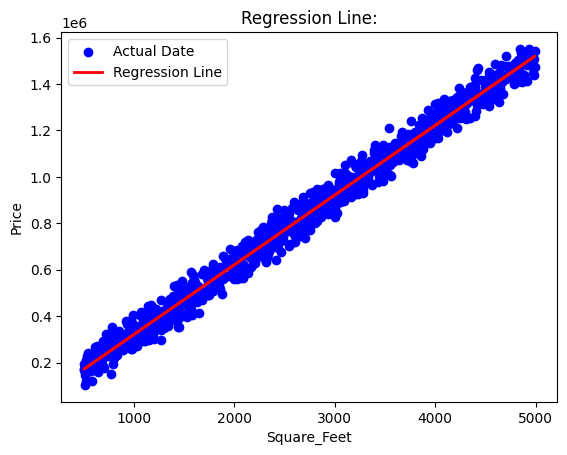

In [ ]:
#Plot regression line
plt.scatter(X_test,Y_test,color='blue',label='Actual Date')
plt.plot(X_test,Y_pre,color='red',linewidth=2,label='Regression Line')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.title('Regression Line:')
plt.legend()
plt.show()

In [ ]:
#Display Model Coefficient
print("\nModel Coefficient:")
print(f"Intercept:{model.intercept_}")
print(f"Slope:{model.coef_[0]}")


Model Coefficient:
Intercept:20545.969596270705
Slope:300.2866682639101


In [ ]:
#Predicted for new data
new_Square_Feet= pd.DataFrame({'Square_Feet' :[345,5661,3333,4443,1111,2343]})
new_Price = model.predict(new_Square_Feet)

print("\nPredicted Price values for given Square_Feet:")
for Square_Feet, Price in zip(new_Square_Feet['Square_Feet'],new_Price):
  print(f" Square_Feet :{Square_Feet}, Predicted Price :{Price:.2f}")




Predicted Price values for given Square_Feet:
 Square_Feet :345, Predicted Price :124144.87
 Square_Feet :5661, Predicted Price :1720468.80
 Square_Feet :3333, Predicted Price :1021401.43
 Square_Feet :4443, Predicted Price :1354719.64
 Square_Feet :1111, Predicted Price :354164.46
 Square_Feet :2343, Predicted Price :724117.63


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pre))
# MAE
mae = mean_absolute_error(Y_test, Y_pre)
# R-squared
r2 = r2_score(Y_test, Y_pre)

print("Model Evaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Model Evaluation Metrics:
Root Mean Squared Error (RMSE): 42807.147226766094
Mean Absolute Error (MAE): 34737.55063848156
R-squared (R²): 0.9875544772870992


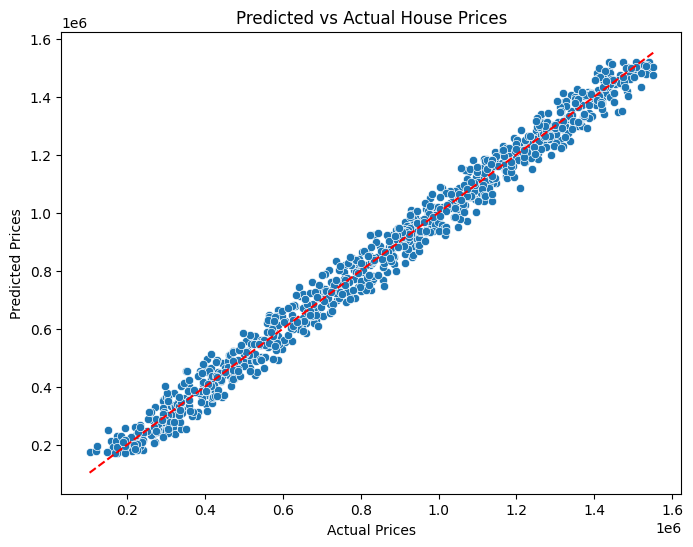

In [ ]:
#Results Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pre)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()
